In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

df = pd.read_csv('data/features.csv')
df = df.sample(frac=1)

df_majority = df[df["Effectiveness"] == 0]

print(len(df_majority))
df_minority = df[df["Effectiveness"] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority))

df = pd.concat([df_majority, df_minority_upsampled])

print(df["Effectiveness"].value_counts())

x = df.iloc[:,[0,1,2,3,4,5,6,7,8,10]]
y = df.iloc[:,11]

sc = RobustScaler()

print(x)

x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


model = Sequential()

model.add(Dense(6,activation="relu",kernel_initializer="random_normal",input_dim=10))
model.add(Dense(6,activation="relu",kernel_initializer="random_normal"))
model.add(Dense(1,activation="sigmoid",kernel_initializer="random_normal"))

model.compile(optimizer ='sgd',loss='binary_crossentropy', metrics =['accuracy'])

model.fit(x_train,y_train,batch_size=400,epochs=100)

#model.evaluate(x_train,y_train)
model.evaluate(x_test,y_test)

216383
1    216383
0    216383
Name: Effectiveness, dtype: int64
        Time_remaining  Timeouts_remaining  Turnovers  Num_stars  \
88936            131.0                   3          0          2   
203498          2490.0                   8          1          0   
206729          2633.0                   8          1          0   
169790             0.2                   1          0          1   
250318            33.9                   1          0          1   
152133          2552.0                   8          3          1   
32404           1468.4                   5          0          1   
221800           492.0                   4          3          0   
17747            236.0                   4          1          1   
85063            462.0                   2          0          0   
104188           454.0                   3          1          1   
1147             535.0                   4          3          1   
96248           1172.0                   2         

Epoch 1/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6931 - accuracy: 0.5207
Epoch 2/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6931 - accuracy: 0.5168
Epoch 3/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6930 - accuracy: 0.5166
Epoch 4/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6929 - accuracy: 0.5697
Epoch 5/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6928 - accuracy: 0.5509
Epoch 6/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6926 - accuracy: 0.5961
Epoch 7/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6923 - accuracy: 0.5986
Epoch 8/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6917 - accuracy: 0.6234
Epoch 9/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.6904 - accuracy: 0.6451
Epoch 10/100
346212/346212 [=========

346212/346212 [==============================] - 1s 2us/step - loss: 0.5823 - accuracy: 0.7011
Epoch 77/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.5820 - accuracy: 0.7016
Epoch 78/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.5818 - accuracy: 0.7019
Epoch 79/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.5816 - accuracy: 0.7020
Epoch 80/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.5813 - accuracy: 0.7027
Epoch 81/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.5811 - accuracy: 0.7027
Epoch 82/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.5809 - accuracy: 0.7028
Epoch 83/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.5808 - accuracy: 0.7030
Epoch 84/100
346212/346212 [==============================] - 1s 2us/step - loss: 0.5806 - accuracy: 0.7029
Epoch 85/100
346212/346212 [=============

[0.5812224910982982, 0.7047277092933655]

In [65]:
df = pd.read_csv('data/features.csv')
df

,Time_remaining,Timeouts_remaining,Turnovers,Num_stars,Coach_win_percentage,Fg_percentage,Coach_success_timeouts_percentage,Lead_diff,Time_diff,Is_down,Point_diff,Effectiveness,NAME,Unnamed: 13
0,2496.0,8,1,1,0.402439,0.400000,1.000000,-15,75.0,0,2,1,1,NaN
1,2421.0,7,0,1,0.402439,0.347826,1.000000,-15,245.0,0,0,1,1,NaN
2,2348.0,8,4,0,0.600646,0.333333,0.000000,-14,165.0,0,4,0,1,NaN
3,1946.0,6,0,1,0.402439,0.461538,1.000000,-11,363.0,0,-8,1,1,NaN
4,1793.0,7,5,0,0.600646,0.625000,0.500000,-6,174.0,1,0,1,1,NaN
5,1619.0,6,1,0,0.600646,0.391304,0.666667,-7,233.0,1,1,1,1,NaN
6,1132.0,5,3,0,0.600646,0.375000,0.500000,-9,145.0,0,2,0,1,NaN
7,987.0,4,2,0,0.600646,0.600000,0.400000,-8,353.0,0,-1,0,1,NaN
8,863.0,5,6,1,0.402439,0.555556,1.000000,-11,222.0,0,-1,1,1,NaN
9,620.0,3,1,0,0.600646,0.666667,0.333333,-7,75.0,1,6,0,1,NaN


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

df = pd.read_csv('data/features.csv')
df = df.sample(frac=1)

df_majority = df[df["Effectiveness"] == 0]

print(len(df_majority))
df_minority = df[df["Effectiveness"] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority))

df = pd.concat([df_majority, df_minority_upsampled])

print(df["Effectiveness"].value_counts())

x = df.iloc[:,0:11]
y = df.iloc[:,11]

print(x, y)

sc = RobustScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

predictions = model.predict(x_test)

216383
1    216383
0    216383
Name: Effectiveness, dtype: int64
        Time_remaining  Timeouts_remaining  Turnovers  Num_stars  \
22908           1782.0                   7          3          1   
95415            351.0                   3          2          2   
122915           475.0                   3          5          1   
246751            78.0                   1          0          1   
261785           354.0                   5          1          0   
176651          1607.0                   6          0          1   
31477           2293.0                   7          1          0   
238980           871.0                   2          0          1   
59350           1608.0                   5          3          1   
32934            882.0                   4          8          1   
40281           1792.0                   7          2          1   
186474             8.0                   1          0          0   
57777           1455.7                   6         

/Users/sguduguntla/anaconda3/envs/nba-hackathon/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6570232656402673
0.6575906955249172


             PC1       PC2
0      -1.213915  0.446658
1       0.336453  0.354570
2       0.183212  0.788794
3      -2.975237  0.558792
4      -2.995547 -0.119426
5       1.962314 -0.347798
6      -0.614256 -0.288759
7      -0.520842 -0.712433
8      -0.389828  4.824419
9       0.761870  0.418633
10      0.285935 -0.446365
11      0.309042  0.804779
12     -0.801992 -0.868443
13      0.028781 -0.349825
14     -0.893137 -0.403823
15      7.332648  2.045942
16     -0.445822 -4.629414
17      2.068988  0.027915
18      1.085943  6.615848
19     -1.154001 -0.617738
20     -1.158233  0.678867
21      2.177721 -0.965493
22     -1.636804  0.503843
23     -0.913242  0.386730
24      1.977599 -0.461275
25     -0.850394 -2.139216
26      0.477521  0.227362
27     -0.320459  0.893488
28     -0.154174  0.859182
29     -1.677666  0.364543
...          ...       ...
432736  0.082163 -1.169207
432737  0.447485 -0.201747
432738 -0.478313 -0.047128
432739  0.617407 -0.152040
432740 -0.286297 -0.171698
4

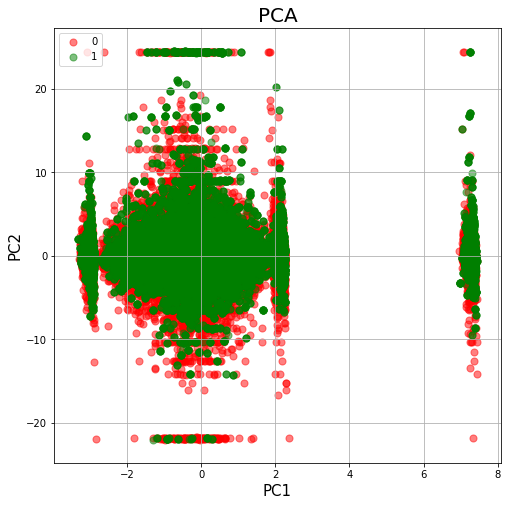

In [102]:
pca = PCA(n_components=2)

principal_comp = pca.fit_transform(x)

principal_df = pd.DataFrame(data=principal_comp, columns=['PC1', 'PC2'])

principal_df.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

print(principal_df, y)

finalDf = pd.concat([principal_df, y], axis=1)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("PC1", fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title("PCA", fontsize=20)

targets = [0, 1]
colors = ['r', 'g']

print(finalDf)

for target, color in zip(targets, colors):
    indices_to_keep = finalDf['Effectiveness'] == target

    ax.scatter(finalDf.loc[indices_to_keep, 'PC1'], finalDf.loc[indices_to_keep, 'PC2'], c=color, alpha=0.5 , s=50)
    
ax.legend(targets)
ax.grid()